Question 7 (40pts): Forecasting: Study the data and competition M-Competition \
https://forecasters.org/resources/time-series-data/  \
Develop a forecasting scheme that beats non-seasonal series in the MC111 dataset. \
Note: I am interested in your effort in trying out AI/ML methods. You can use python codes available on the internet provided you understand what they are doing. 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import torch

# GPU SETUP
print(f"Number of devices available: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Pytorch version: {torch.__version__}")

Number of devices available: 1
GPU: NVIDIA GeForce RTX 3050 Laptop GPU is available.
Pytorch version: 2.3.0+cu118


In [33]:
# DATA EXTRACTION
df_calendar_raw = pd.read_csv('calendar.csv')
df_train_evaluation_raw = pd.read_csv('sales_train_evaluation.csv')
df_train_validation_raw = pd.read_csv('sales_train_validation.csv')
df_sell_prices_raw = pd.read_csv('sell_prices.csv')

print("df_calendar_raw")
display(df_calendar_raw)
print("df_train_evaluation_raw")
display(df_train_evaluation_raw)
print("df_train_validation_raw")
display(df_train_validation_raw)
print("df_sell_prices_raw")
display(df_sell_prices_raw)

# DATA ANALYSIS
# list(df_calendar_raw['event_name_1'].unique())
# print(len(list(df_calendar_raw['event_name_1'].unique())))
# print(len(list(df_calendar_raw['event_type_1'].unique())))
# print(list(df_calendar_raw['event_type_1'].unique()))


df_calendar_raw


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


df_train_evaluation_raw


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


df_train_validation_raw


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


df_sell_prices_raw


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


31
5
[nan, 'Sporting', 'Cultural', 'National', 'Religious']


In [3]:
# DATA CLEANING

other_fields = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

df_train_evaluation = df_train_evaluation_raw.drop(columns=other_fields).set_index('id').T
print("df_train_evaluation")
display(df_train_evaluation)

print("df_train_validation")
df_train_validation = df_train_validation_raw.drop(columns=other_fields).set_index('id').T
display(df_train_validation)

df_train_evaluation


id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,1,0,0,1,5,0,1,...,3,6,3,0,0,1,0,1,0,0
d_1938,3,0,2,3,0,0,0,4,0,1,...,1,4,3,1,2,0,1,0,1,2
d_1939,3,0,3,0,2,5,1,1,0,0,...,3,4,3,1,1,0,0,1,1,2
d_1940,0,0,0,2,1,2,1,40,1,0,...,0,1,0,0,3,1,1,0,1,5


df_train_validation


id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,1,1,1,0,1,0,1,4,0,0,...,4,1,1,0,0,0,0,1,1,0
d_1910,3,0,0,1,2,0,0,6,0,0,...,2,3,3,0,2,1,0,0,0,0
d_1911,0,0,1,3,2,2,0,3,0,2,...,0,1,6,0,3,0,0,0,3,0
d_1912,1,0,1,7,2,0,1,2,0,0,...,3,0,0,4,2,0,1,1,1,0


### Data Description

• date: The date in a “y-m-d” format.

• wm_yr_wk: The id of the week the date belongs to.

• weekday: The type of the day (Saturday, Sunday, …, Friday).

• wday: The id of the weekday, starting from Saturday.

• month: The month of the date.

• year: The year of the date.

• event_name_1: If the date includes an event, the name of this event.

• event_type_1: If the date includes an event, the type of this event.

• event_name_2: If the date includes a second event, the name of this event.

• event_type_2: If the date includes a second event, the type of this event.

• snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP purchases on the examined date. 1 indicates that SNAP purchases are allowed.

# Univariate Model Training

### First Iteration
An LSTM model is trained to forecast one of the series (HOBBIES_1_001_CA_1). 

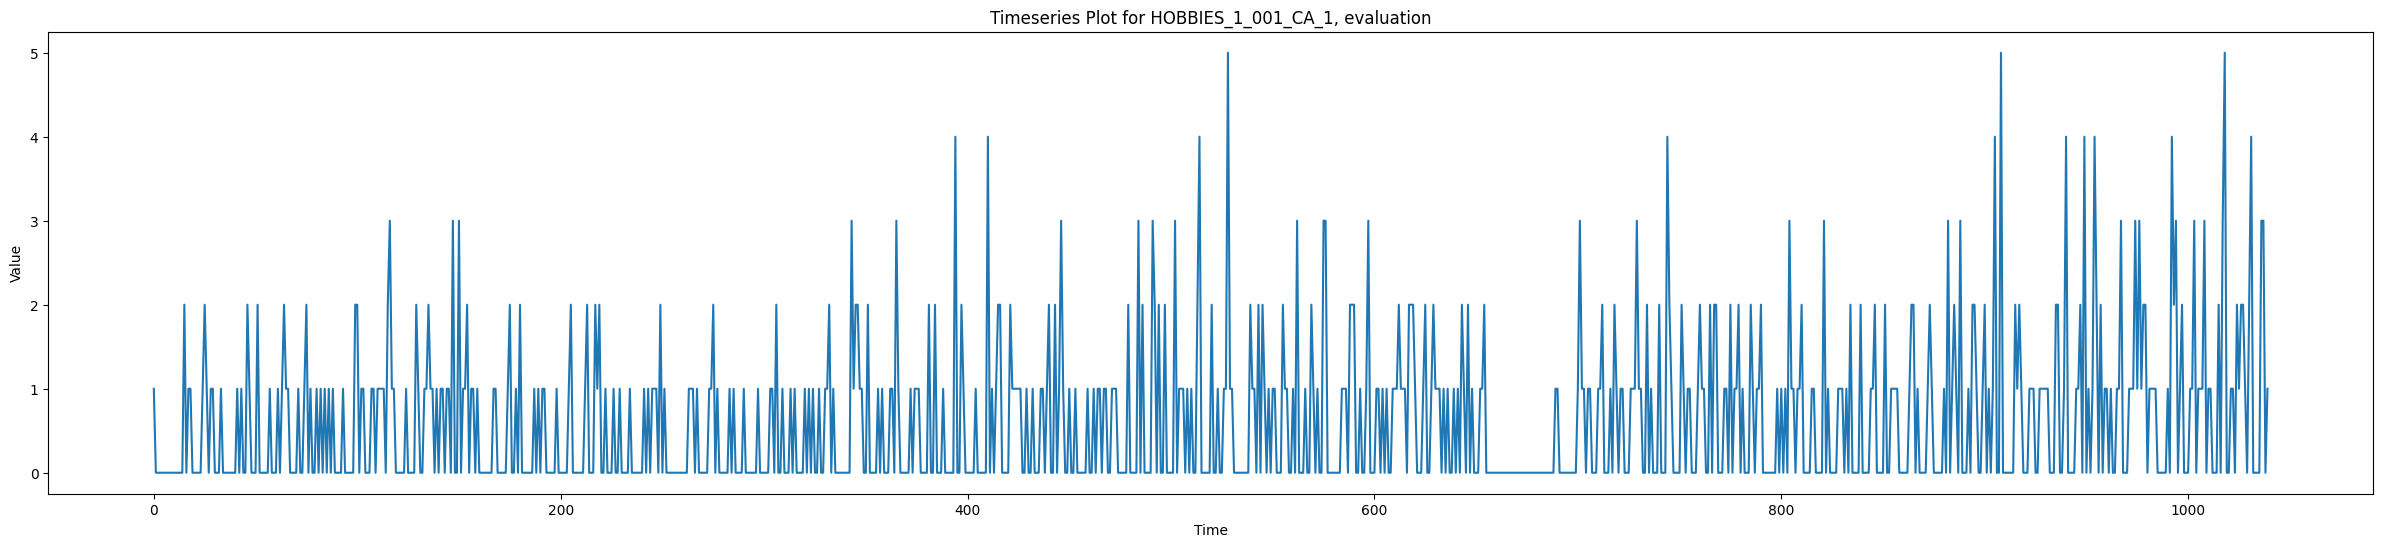

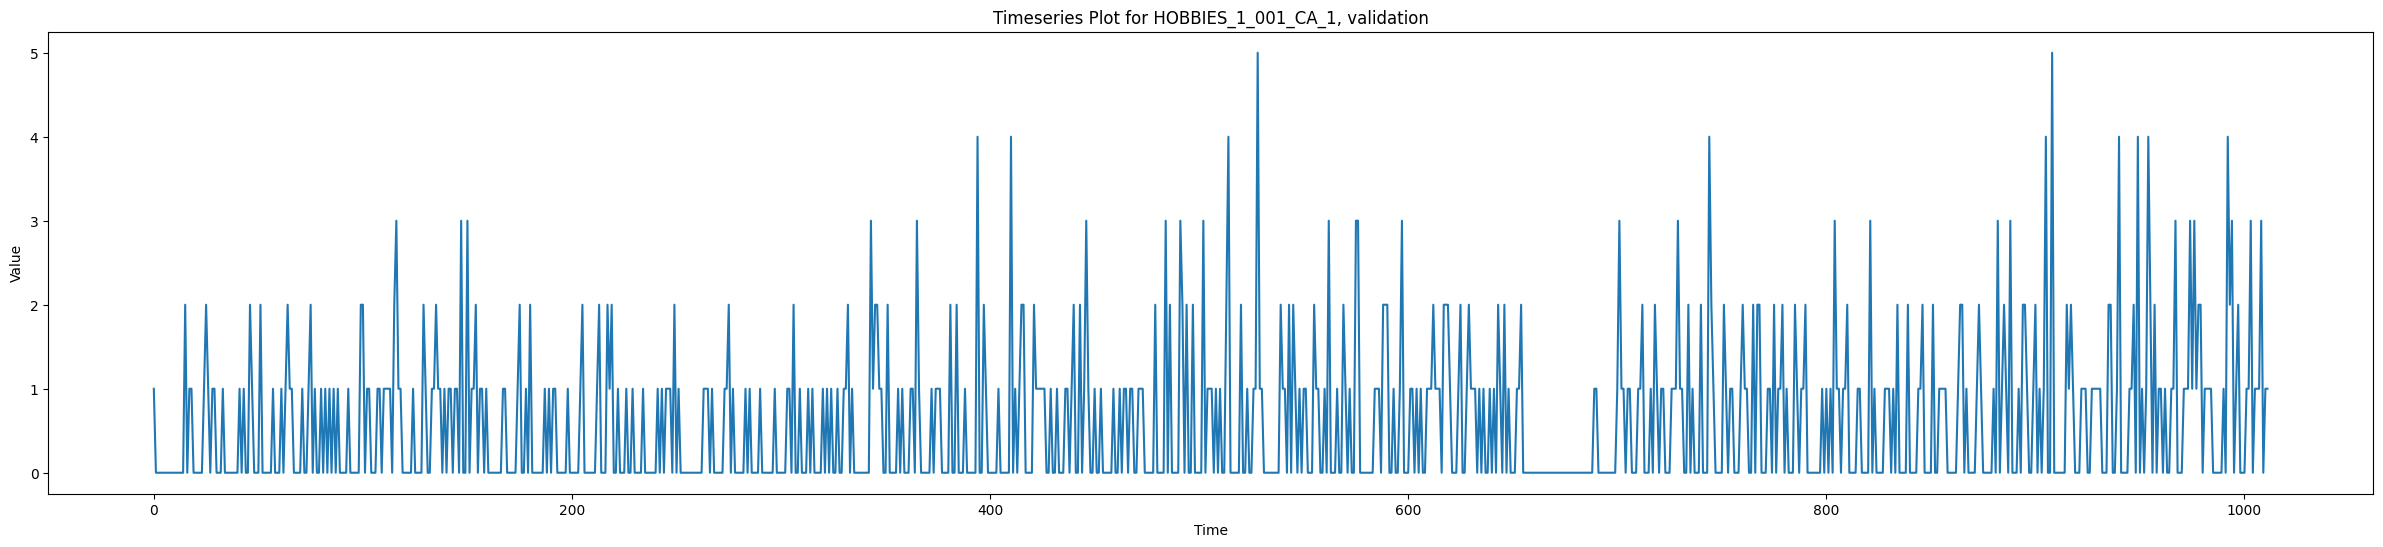

In [47]:
# DATA VISUALIZATION

series = 'HOBBIES_1_001_CA_1'
timeseries_train_evaluation = df_train_evaluation[[series+'_evaluation']].values.astype('float32')
timeseries_train_validation = df_train_validation[[series+'_validation']].values.astype('float32')

def remove_leading_zeros(series):
    series = list(series)
    first_non_zero_index = next((index for index, value in enumerate(series) if value != 0), None)
    if first_non_zero_index is not None:
        return series[first_non_zero_index:]
    return series

timeseries_train_evaluation = np.array(remove_leading_zeros(timeseries_train_evaluation))
timeseries_train_validation = np.array(remove_leading_zeros(timeseries_train_validation))

plt.figure(figsize=(30, 6))
plt.plot(timeseries_train_evaluation)
plt.title(f"Timeseries Plot for {series}, evaluation")
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(timeseries_train_validation)
plt.title(f"Timeseries Plot for {series}, validation")
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [49]:
# DATA LOADING FOR THE MODEL 

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction

    Source: 
        https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 7
X_train, y_train = create_dataset(timeseries_train_evaluation, lookback=lookback)
X_test, y_test = create_dataset(timeseries_train_validation, lookback=lookback)

# Transfer datasets to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [67]:
# MODEL DEFINITION
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

class MyLSTM(nn.Module):
    def __init__(self):
        super(MyLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

Epoch 0: train RMSE 0.8863, test RMSE 0.8637
Epoch 100: train RMSE 0.8188, test RMSE 0.8054
Epoch 200: train RMSE 0.7783, test RMSE 0.7678
Epoch 300: train RMSE 0.7650, test RMSE 0.7551
Epoch 400: train RMSE 0.7631, test RMSE 0.7528
Epoch 500: train RMSE 0.7597, test RMSE 0.7497
Epoch 600: train RMSE 0.7581, test RMSE 0.7491
Epoch 700: train RMSE 0.7567, test RMSE 0.7476
Epoch 800: train RMSE 0.7562, test RMSE 0.7472
Epoch 900: train RMSE 0.7563, test RMSE 0.7472
Epoch 1000: train RMSE 0.7553, test RMSE 0.7464
Epoch 1100: train RMSE 0.7552, test RMSE 0.7463
Epoch 1200: train RMSE 0.7548, test RMSE 0.7459
Epoch 1300: train RMSE 0.7547, test RMSE 0.7457
Epoch 1400: train RMSE 0.7549, test RMSE 0.7458
Epoch 1500: train RMSE 0.7545, test RMSE 0.7452
Epoch 1600: train RMSE 0.7542, test RMSE 0.7453
Epoch 1700: train RMSE 0.7542, test RMSE 0.7456
Epoch 1800: train RMSE 0.7549, test RMSE 0.7457
Epoch 1900: train RMSE 0.7538, test RMSE 0.7450
Epoch 1999: train RMSE 0.7540, test RMSE 0.7449
Trai

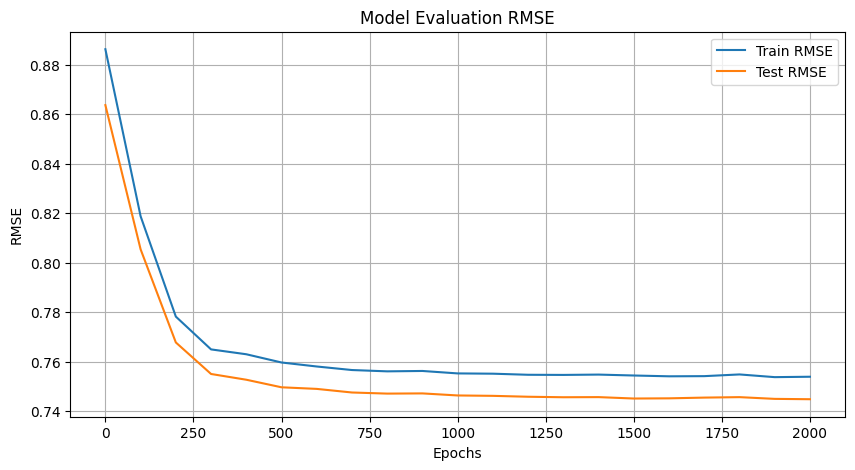

In [68]:
# MODEL TRAINING

model = MyLSTM().to(device)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
train_rmse_list, test_rmse_list = [], []
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Validation
    if epoch % 100 == 0 or epoch == (n_epochs-1):
        model.eval()
        with torch.no_grad():
            y_pred_train = model(X_train)
            train_rmse = np.sqrt(loss_fn(y_pred_train, y_train).item())
            y_pred_test = model(X_test)
            test_rmse = np.sqrt(loss_fn(y_pred_test, y_test).item())
            train_rmse_list.append(train_rmse)
            test_rmse_list.append(test_rmse)
        print(f"Epoch {epoch}: train RMSE {train_rmse:.4f}, test RMSE {test_rmse:.4f}")
print("Training complete.")

# Plotting the RMSE
plt.figure(figsize=(10, 5))
plt.plot(range(0, n_epochs+1, 100), train_rmse_list, label='Train RMSE')
plt.plot(range(0, n_epochs+1, 100), test_rmse_list, label='Test RMSE')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot from List')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Model Evaluation RMSE')
plt.grid(True)
plt.show()

In [71]:
# # PLOTTING THE FORECAST 

# with torch.no_grad():
#     # shift train predictions for plotting
#     train_plot = np.ones_like(timeseries_train_evaluation) * np.nan
#     y_pred_train = model(X_train).cpu().numpy()
#     y_pred_train = y_pred_train[:, -1, :]
#     train_plot[lookback:lookback + len(y_pred_train)] = y_pred_train
    
#     # shift test predictions for plotting
#     test_plot = np.ones_like(timeseries_train_evaluation) * np.nan
#     y_pred_test = model(X_test).cpu().numpy()
#     y_pred_test = y_pred_test[:, -1, :]
#     test_plot[len(timeseries_train_evaluation) - len(y_pred_test):len(timeseries_train_evaluation)] = y_pred_test

# # plot
# plt.figure(figsize=(30, 6))
# plt.plot(timeseries_train_evaluation, c='b')
# plt.plot(train_plot, c='r')
# plt.plot(test_plot, c='g')
# plt.show()

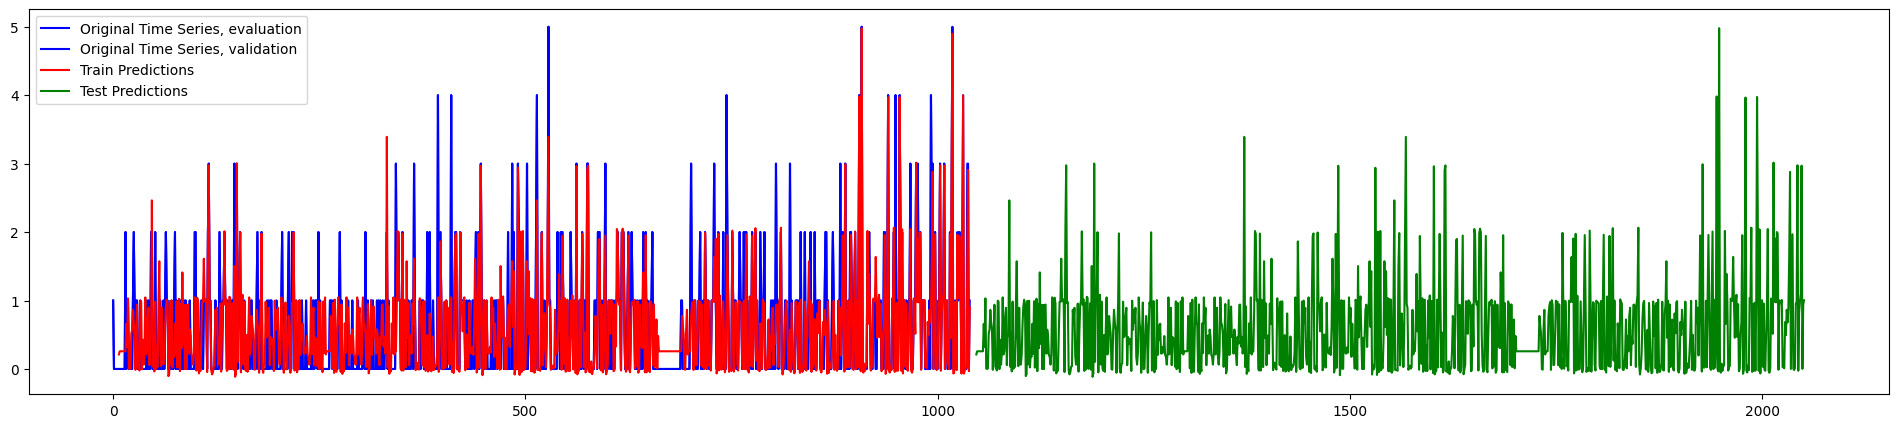

In [75]:
# PLOTTING THE FORECAST

with torch.no_grad():
    # Shift train predictions for plotting
    train_plot = np.ones((len(timeseries_train_evaluation), 1)) * np.nan
    y_pred_train = model(X_train)[:, -1, :].cpu().numpy()  # Move tensor to CPU and convert to NumPy
    train_plot[lookback:lookback + len(y_pred_train)] = y_pred_train
    
    # Shift test predictions for plotting
    total_length = len(timeseries_train_evaluation) + len(timeseries_train_validation)
    test_plot = np.ones((total_length, 1)) * np.nan
    y_pred_test = model(X_test)[:, -1, :].cpu().numpy()  # Move tensor to CPU and convert to NumPy
    test_plot[len(timeseries_train_evaluation) + lookback:len(timeseries_train_evaluation) + lookback + len(y_pred_test)] = y_pred_test

# Plot original data vs predictions
plt.figure(figsize=(24, 5))
plt.plot(timeseries_train_evaluation, c='b', label='Original Time Series, evaluation')
plt.plot(timeseries_train_validation, c='b', label='Original Time Series, validation')
plt.plot(train_plot, c='r', label='Train Predictions')
plt.plot(test_plot, c='g', label='Test Predictions')
plt.legend()
plt.show()

# Plot the prediction for the next 28 days



In [110]:
print(train_size)

1040


In [134]:
# sales = df_train_validation[series+"_validation"].tail(7)
past_7_days_sales = np.array(df_train_evaluation[series+"_evaluation"].tail(7)) 

input_data = torch.tensor(past_7_days_sales, dtype=torch.float32).view(1, 7, 1).to(device)

model.eval()

dict_predictions = {}
for i in range(4): 
    weekly_prediction = []
    for _ in range(7):
        with torch.no_grad():
            if i == 0: 
                input_data = torch.tensor(past_7_days_sales, dtype=torch.float32).view(1, 7, 1).to(device)
            else: 
                past_prediction = dict_predictions[i-1]
                input_data = torch.tensor(past_prediction, dtype=torch.float32).view(1, 7, 1).to(device)

            prediction = model(input_data)            
            predicted_value = prediction[0, -1, 0].item()
            weekly_prediction.append(predicted_value)
            
            input_data = torch.cat((input_data[:, 1:, :], torch.tensor([[[predicted_value]]], dtype=torch.float32).to(device)), dim=1)
    dict_predictions[i] = np.array(weekly_prediction)

for prediction_key in dict_predictions.keys():
    print(list(dict_predictions[prediction_key]))

[1.4748221635818481, 1.4748221635818481, 1.4748221635818481, 1.4748221635818481, 1.4748221635818481, 1.4748221635818481, 1.4748221635818481]
[0.4461688995361328, 0.4461688995361328, 0.4461688995361328, 0.4461688995361328, 0.4461688995361328, 0.4461688995361328, 0.4461688995361328]
[0.3961995244026184, 0.3961995244026184, 0.3961995244026184, 0.3961995244026184, 0.3961995244026184, 0.3961995244026184, 0.3961995244026184]
[0.4760608673095703, 0.4760608673095703, 0.4760608673095703, 0.4760608673095703, 0.4760608673095703, 0.4760608673095703, 0.4760608673095703]
